# Initialize and Setup

In [9]:
import os
import time

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

import ml_util as utl

save_directory = "figures/KNN"
model_name = "KNN"

folders = ["figures/KNN/Complexity_Analysis",
           "figures/KNN/Grid_Search_Results",
           "figures/KNN/Learning_Curves",
           "figures/KNN/Confusion_Matrix",
           "figures/KNN/Metrics"]

directories = {
    "Save Directory": "figures/KNN",
    "Initial Complexity Analysis": "figures/KNN/Initial Complexity Analysis",
    "Grid Search Results": "figures/KNN/Grid Search Results",
    "Learning Curves": "figures/KNN/Learning Curves",
    "Final Complexity Analysis": "figures/KNN/Final Complexity Analysis"
}

Random_Number = 42
TESTING = False
n_jobs = -1
cv = 5
np.random.seed(42)
get_ipython().system('pip install pyarrow')

In [10]:
gathered_data = utl.setup(["MNIST"])
gathered_data_fashion = utl.setup(["Fashion-MNIST"])
train_X, train_y, valid_X, valid_y, test_X, test_y = utl.split_data(gathered_data["MNIST"]["X"],
                                                                    gathered_data["MNIST"]["y"], normalize=True)
fashion_train_X, fashion_train_y, fashion_valid_X, fashion_valid_y, fashion_test_X, fashion_test_y = utl.split_data(
    gathered_data_fashion["Fashion-MNIST"]["X"],
    gathered_data_fashion["Fashion-MNIST"]["y"],
    normalize=True)


dataset folder already exists.
MNIST dataset found:
	Loading MNIST.feather
	Finished loading MNIST dataset
dataset folder already exists.
Fashion-MNIST dataset found:
	Loading Fashion-MNIST.feather
	Finished loading Fashion-MNIST dataset


In [11]:
CHECK_FOLDER = os.path.isdir(save_directory)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(save_directory)
    print("created folder : ", save_directory)
else:
    print(save_directory, "folder already exists.")

for f in folders:
    if not os.path.isdir(f):
        os.makedirs(f)
        print("created folder : ", f)
    else:
        print(f, "folder already exists.")

figures/KNN folder already exists.
figures/KNN/Complexity_Analysis folder already exists.
figures/KNN/Grid_Search_Results folder already exists.
figures/KNN/Learning_Curves folder already exists.
figures/KNN/Confusion_Matrix folder already exists.
figures/KNN/Metrics folder already exists.


In [12]:
# N Neighbors ~ default is 5, the number of neighbors used in calculations, vary this number

# Algorithm ~ 'kd_tree'       
#             'ball_tree'

if TESTING:
    val = 1000
    pred_val = 1000
    train_sizes = np.linspace(0.05, 1.00, 5)
else:
    val = 3000
    pred_val = 3000
    train_sizes = np.linspace(0.05, 1.00, 20)
print(train_sizes)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]


In [ ]:
val

In [ ]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "svm_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST Learning Curve"
        f_name = f"{model_name}_MNIST"
        optimized_svm = best_rbf_mnist_estimator
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
        optimized_svm = best_rbf_fashion_estimator
    
    res['svm_results'], res['cv_results'] = utl.plot_learning_curve(estimator=optimized_svm, title=title,
                                                                    train_X=temp_train_X, train_y=temp_train_y, cv=cv,
                                                                    f_name=f_name, train_sizes=train_sizes,
                                                                    n_jobs=n_jobs, folder="SVM",
                                                                    save_individual=True, TESTING=True, backend='loky',
                                                                    extra_name="RBF_Final")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

# Initial Model Complexity

### Model Complexity: N Neighbors

In [ ]:

if TESTING:
    parameter_range = np.arange(1, 3, 1)
else:
    parameter_range = np.arange(1, 15, 1)
param_name = 'n_neighbors'
param_name_plot = 'Number of Neighbors'
mnist_train_results = None
mnist_test_results = None
fashion_train_results = None
fashion_test_results = None

In [ ]:
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_MNIST"
        algorithm_name = f"{model_name} {param_name} MNIST\n Model Complexity"
        plot_title = f"{model_name} MNIST\n Model Complexity"
        ex = "_MNIST_"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_Fashion_MNIST"
        algorithm_name = f"{model_name} {param_name} Fashion MNIST\n Model Complexity"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
        ex = "Fashion_MNIST_"
    
    temp_train, temp_test = utl.get_model_complexity(classifier=KNeighborsClassifier(),
                                                     train_X=temp_train_X,
                                                     train_y=temp_train_y, parameter_name=param_name,
                                                     save_dir=save_directory,
                                                     algorithm_name=algorithm_name, parameter_range=parameter_range,
                                                     cv=cv, fileName=ex,
                                                     n_jobs=n_jobs, verbose=5, backend='loky',
                                                     param_name_for_plot=param_name_plot,
                                                     f_name=f_name, plot_title=plot_title, extra_name=f'_n_neighbors_{ex}',
                                                     folder="KNN")
    if i == 0:
        mnist_train_results = temp_train
        mnist_test_results = temp_test
    else:
        fashion_train_results = temp_train
        fashion_test_results = temp_test

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

In [ ]:
utl.plot_combined_complexity("KNN", "Number of Neighbors", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Horizontal', plt_width=12, plt_height=6,
                             mnist_train_complex=mnist_train_results, mnist_test_complex=mnist_test_results,
                             fashion_train_complex=fashion_train_results, fashion_test_complex=fashion_test_results,
                             folder="KNN", extra_name="N_Neighbors_")
utl.plot_combined_complexity("KNN", "Number of Neighbors", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Vertical', plt_height=8,
                             mnist_train_complex=mnist_train_results, mnist_test_complex=mnist_test_results,
                             fashion_train_complex=fashion_train_results, fashion_test_complex=fashion_test_results,
                             folder="KNN", extra_name="N_Neighbors")

### Model Complexity: Leaf Size

In [ ]:
if TESTING:
    parameter_range = np.arange(1, 3, 1)
else:
    parameter_range = np.arange(1, 15, 1)
param_name = 'leaf_size'
param_name_plot = 'Leaf Size'
mnist_train_results_leaf = None
mnist_test_results_leaf = None
fashion_train_results_leaf = None
fashion_test_results_leaf = None

In [ ]:
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_MNIST"
        algorithm_name = f"{model_name} {param_name} MNIST\n Model Complexity"
        plot_title = f"{model_name} MNIST\n Model Complexity"
        ex = "MNIST_LeafSize"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_Fashion_MNIST"
        algorithm_name = f"{model_name} {param_name} Fashion MNIST\n Model Complexity"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
        ex = "FASHION_MNIST_LeafSize"
    
    temp_train, temp_test = utl.get_model_complexity(classifier=KNeighborsClassifier(n_neighbors=1),
                                                     train_X=temp_train_X,
                                                     train_y=temp_train_y, parameter_name=param_name,
                                                     save_dir=save_directory,
                                                     algorithm_name=algorithm_name, parameter_range=parameter_range,
                                                     cv=cv, fileName=ex,
                                                     n_jobs=n_jobs, verbose=5, backend='loky',
                                                     param_name_for_plot=param_name_plot,
                                                     f_name=f_name, plot_title=plot_title, extra_name='_leaf_size_',
                                                     folder="KNN")
    if i == 0:
        mnist_train_results_leaf = temp_train
        mnist_test_results_leaf = temp_test
    else:
        fashion_train_results_leaf = temp_train
        fashion_test_results_leaf = temp_test

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

In [ ]:
utl.plot_combined_complexity("KNN", "Leaf Size", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Horizontal', plt_width=12, plt_height=6,
                             mnist_train_complex=mnist_train_results_leaf, mnist_test_complex=mnist_test_results_leaf,
                             fashion_train_complex=fashion_train_results_leaf,
                             fashion_test_complex=fashion_test_results_leaf,
                             extra_name='_leaf_size_', folder="KNN")
utl.plot_combined_complexity("KNN", "Leaf Size", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Vertical', plt_height=8,
                             mnist_train_complex=mnist_train_results_leaf, mnist_test_complex=mnist_test_results_leaf,
                             fashion_train_complex=fashion_train_results_leaf,
                             fashion_test_complex=fashion_test_results_leaf,
                             extra_name='_leaf_size_', folder="KNN")

# Initial Confusion Matrix

In [ ]:
clf = KNeighborsClassifier(algorithm=f"{type_1}")
clf.fit(train_X.iloc[:val, :], train_y.iloc[:val])

clf2 = KNeighborsClassifier(algorithm=f"{type_1}")
clf2.fit(fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val])

In [ ]:
utl.plot_combined_confusion_matrix(clf, valid_X, valid_y, clf2, fashion_valid_X, fashion_valid_y,
                                   directory=save_directory, fmt="d", plot_width=12, plot_height=6,
                                   extra_name="Initial_Confusion", folder="KNN")

# Initial Learning Curve

In [ ]:
knn = KNeighborsClassifier(algorithm="ball_tree")

In [ ]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {'plt': None,
           'dt_results': None,
           'cv_results': None}
    
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST\n Learning Curve"
        f_name = f"{model_name}_MNIST"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST\n Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
    
    res['knn_results'], res['cv_results'] = utl.plot_learning_curve(estimator=knn, title=title,
                                                                    train_X=temp_train_X, train_y=temp_train_y, cv=cv,
                                                                    f_name=f_name, train_sizes=train_sizes,
                                                                    save_individual=True,
                                                                    TESTING=True, backend='loky', n_jobs=n_jobs,
                                                                    folder="KNN")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time


# Initial Metrics

In [ ]:
clf = KNeighborsClassifier(algorithm=f"{type_1}") # need to change to reflect learning curve results
p, r, f1 = utl.plot_precision_recall(clf, train_X.iloc[:val, :], train_y.iloc[:val], valid_X.iloc[:val, :],
                                 valid_y.iloc[:val], folder="KNN", dataset_name="MNIST",
                                 plot_title="K Nearest Neighbors")

# Gridsearch

In [ ]:
if TESTING:
    all_parameters = {
        'n_neighbors': np.arange(5, 11, 5),
        'leaf_size': np.arange(10, 11, 10),
    }
else:
    all_parameters = {
        'n_neighbors': np.arange(1, 5+1, 5),
        'weights': ['uniform', 'distance'],
        'leaf_size': np.arange(1, 50+1, 5),
        'algorithm': ['ball_tree', 'kd_tree']
    }


best_mnist_estimator = None
best_fashion_estimator = None

In [ ]:
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_MNIST"
        algorithm_name = f"{model_name} MNIST Model Complexity"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        f_name = f"{model_name}_Fashion_MNIST"
        algorithm_name = f"{model_name} Fashion MNIST Model Complexity"
    
    grid_results_mnist, optimized_dt_mnist = utl.run_grid_search(classifier=KNeighborsClassifier(),
                                                                 parameters=all_parameters, train_X=temp_train_X,
                                                                 train_y=temp_train_y, cv=cv,
                                                                 n_jobs=n_jobs, verbose=10, return_train_score=True,
                                                                 refit=True, save_dir=save_directory,
                                                                 algorithm_name=algorithm_name, backend='loky',
                                                                 folder="KNN")
    if i == 0:
        best_mnist_estimator = optimized_dt_mnist.best_estimator_
    else:
        best_fashion_estimator = optimized_dt_mnist.best_estimator_

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

In [13]:
import pandas as pd
import time
import glob
directory = f"{os.getcwd()}/figures/KNN/Grid_Search_Results/"
files = glob.glob(f"{directory}/*")
file_names = set([i.split("\\")[-1]
                 .split(".")[0] for i in files])

In [14]:
for i in files:
    print(i)

/root/figures/KNN/Grid_Search_Results/KNN MNIST Model Complexity_Grid_Search_Results.pkl
/root/figures/KNN/Grid_Search_Results/KNN Fashion MNIST Model Complexity_Grid_Search_Results.pkl
/root/figures/KNN/Grid_Search_Results/KNN Fashion MNIST Model Complexity_Grid_Object__.pkl
/root/figures/KNN/Grid_Search_Results/KNN MNIST Model Complexity_Grid_Object__.pkl


In [15]:
best_mnist = pd.read_pickle("/root/figures/KNN/Grid_Search_Results/KNN MNIST Model Complexity_Grid_Object__.pkl").best_estimator_
best_fashion = pd.read_pickle("/root/figures/KNN/Grid_Search_Results/KNN Fashion MNIST Model Complexity_Grid_Object__.pkl").best_estimator_

In [19]:
best_mnist

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
best_fashion

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [23]:
val = 6000

# Final Learning Curve

Working on learning curve: 0
[learning_curve] Training set sizes: [ 240  480  720  960 1200 1440 1680 1919 2160 2399 2639 2880 3120 3360
 3600 3839 4080 4320 4560 4800]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    1.1s remaining:   53.5s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   20.8s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   34.8s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   57.4s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:  1.3min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  1.7min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  2.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  3.0min remaining:   48.1s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  3.7min remaining:   24.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished


Working on learning curve: 1
[learning_curve] Training set sizes: [ 240  480  720  960 1200 1440 1680 1919 2160 2399 2639 2880 3120 3360
 3600 3839 4080 4320 4560 4800]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    1.9s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   25.9s remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   39.2s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:  1.0min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:  1.4min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  1.8min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  2.1min remaining:   59.9s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  2.5min remaining:   39.8s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  2.9min remaining:   19.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished


Run Time: 530.3565244674683s


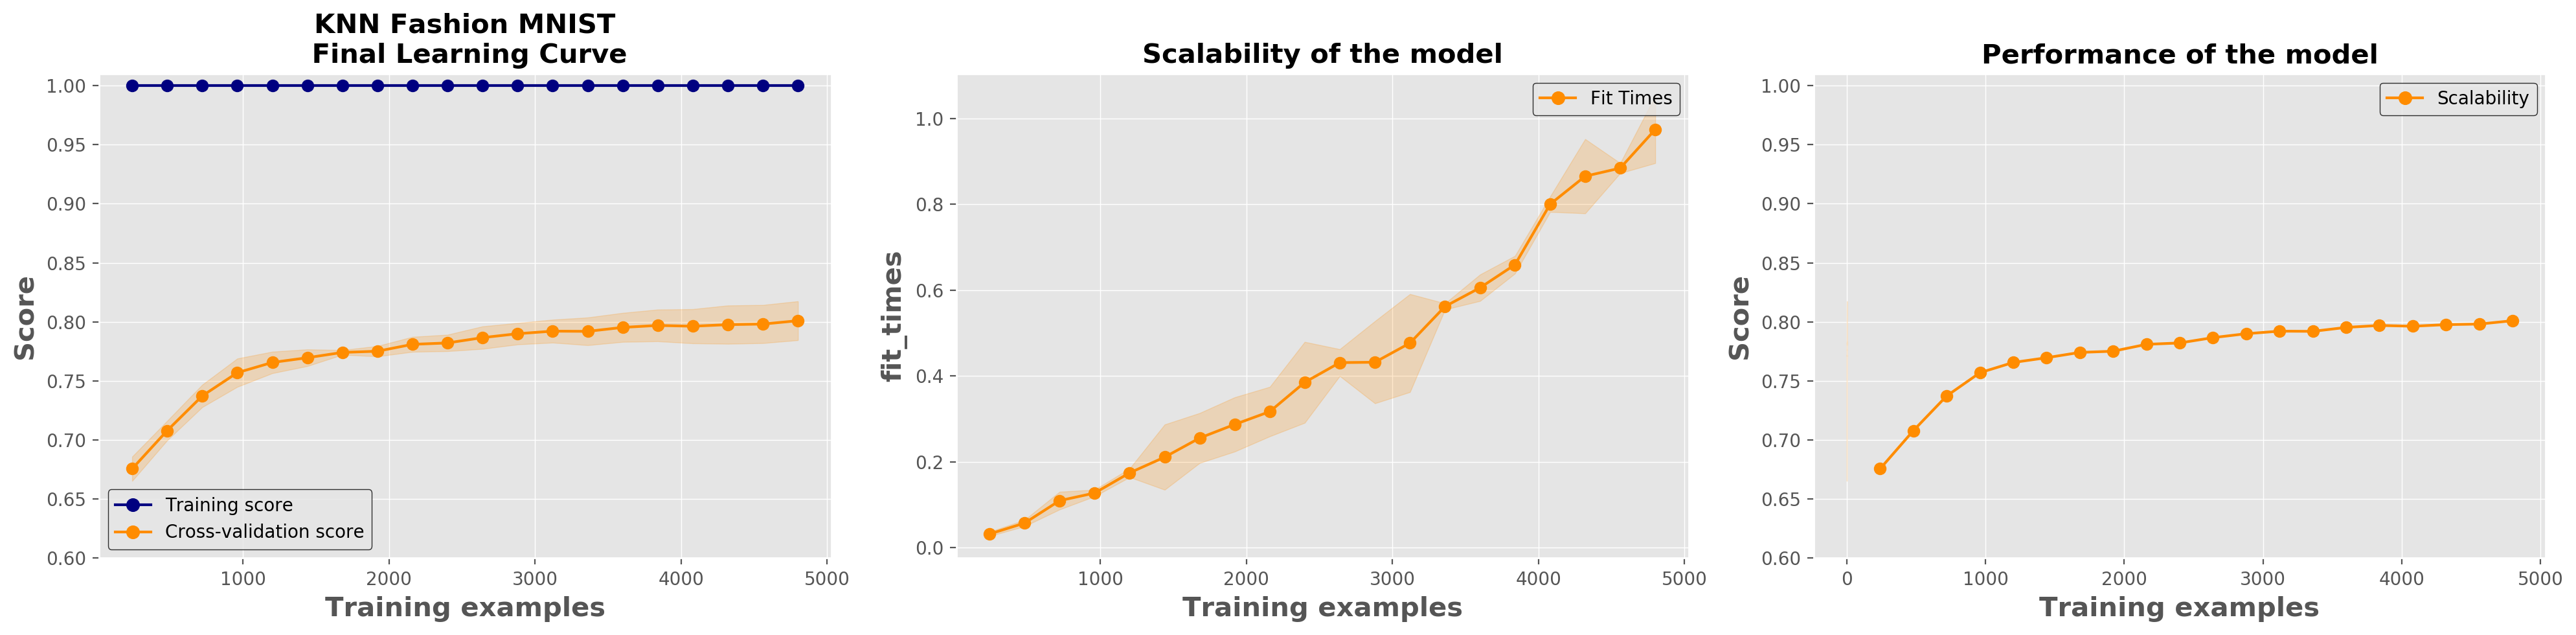

In [28]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {'plt': None,
           'dt_results': None,
           'cv_results': None}
    
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST\n Final Learning Curve"
        f_name = f"{model_name}_MNIST"
        ex = "KNN_MNIST_FINAL"
        optimized_knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST\n Final Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
        ex = "KNN_FASHION_MNIST_FINAL"
        optimized_knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
    
    res['knn_results'], res['cv_results'] = utl.plot_learning_curve(estimator=optimized_knn, title=title,
                                                                    train_X=temp_train_X,
                                                                    train_y=temp_train_y, cv=cv, f_name=f_name,
                                                                    train_sizes=train_sizes, extra_name=ex,
                                                                    save_individual=True, TESTING=True, backend='loky',
                                                                    n_jobs=n_jobs, folder="KNN")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
46730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Final Confusion Matrix on Test set "(O_o)"

In [26]:
clf = KNeighborsClassifier(n_neighbors=1, weights='distance').fit(train_X.iloc[:val, :], train_y.iloc[:val])
clf2 = KNeighborsClassifier(n_neighbors=1, weights='distance').fit(fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val])

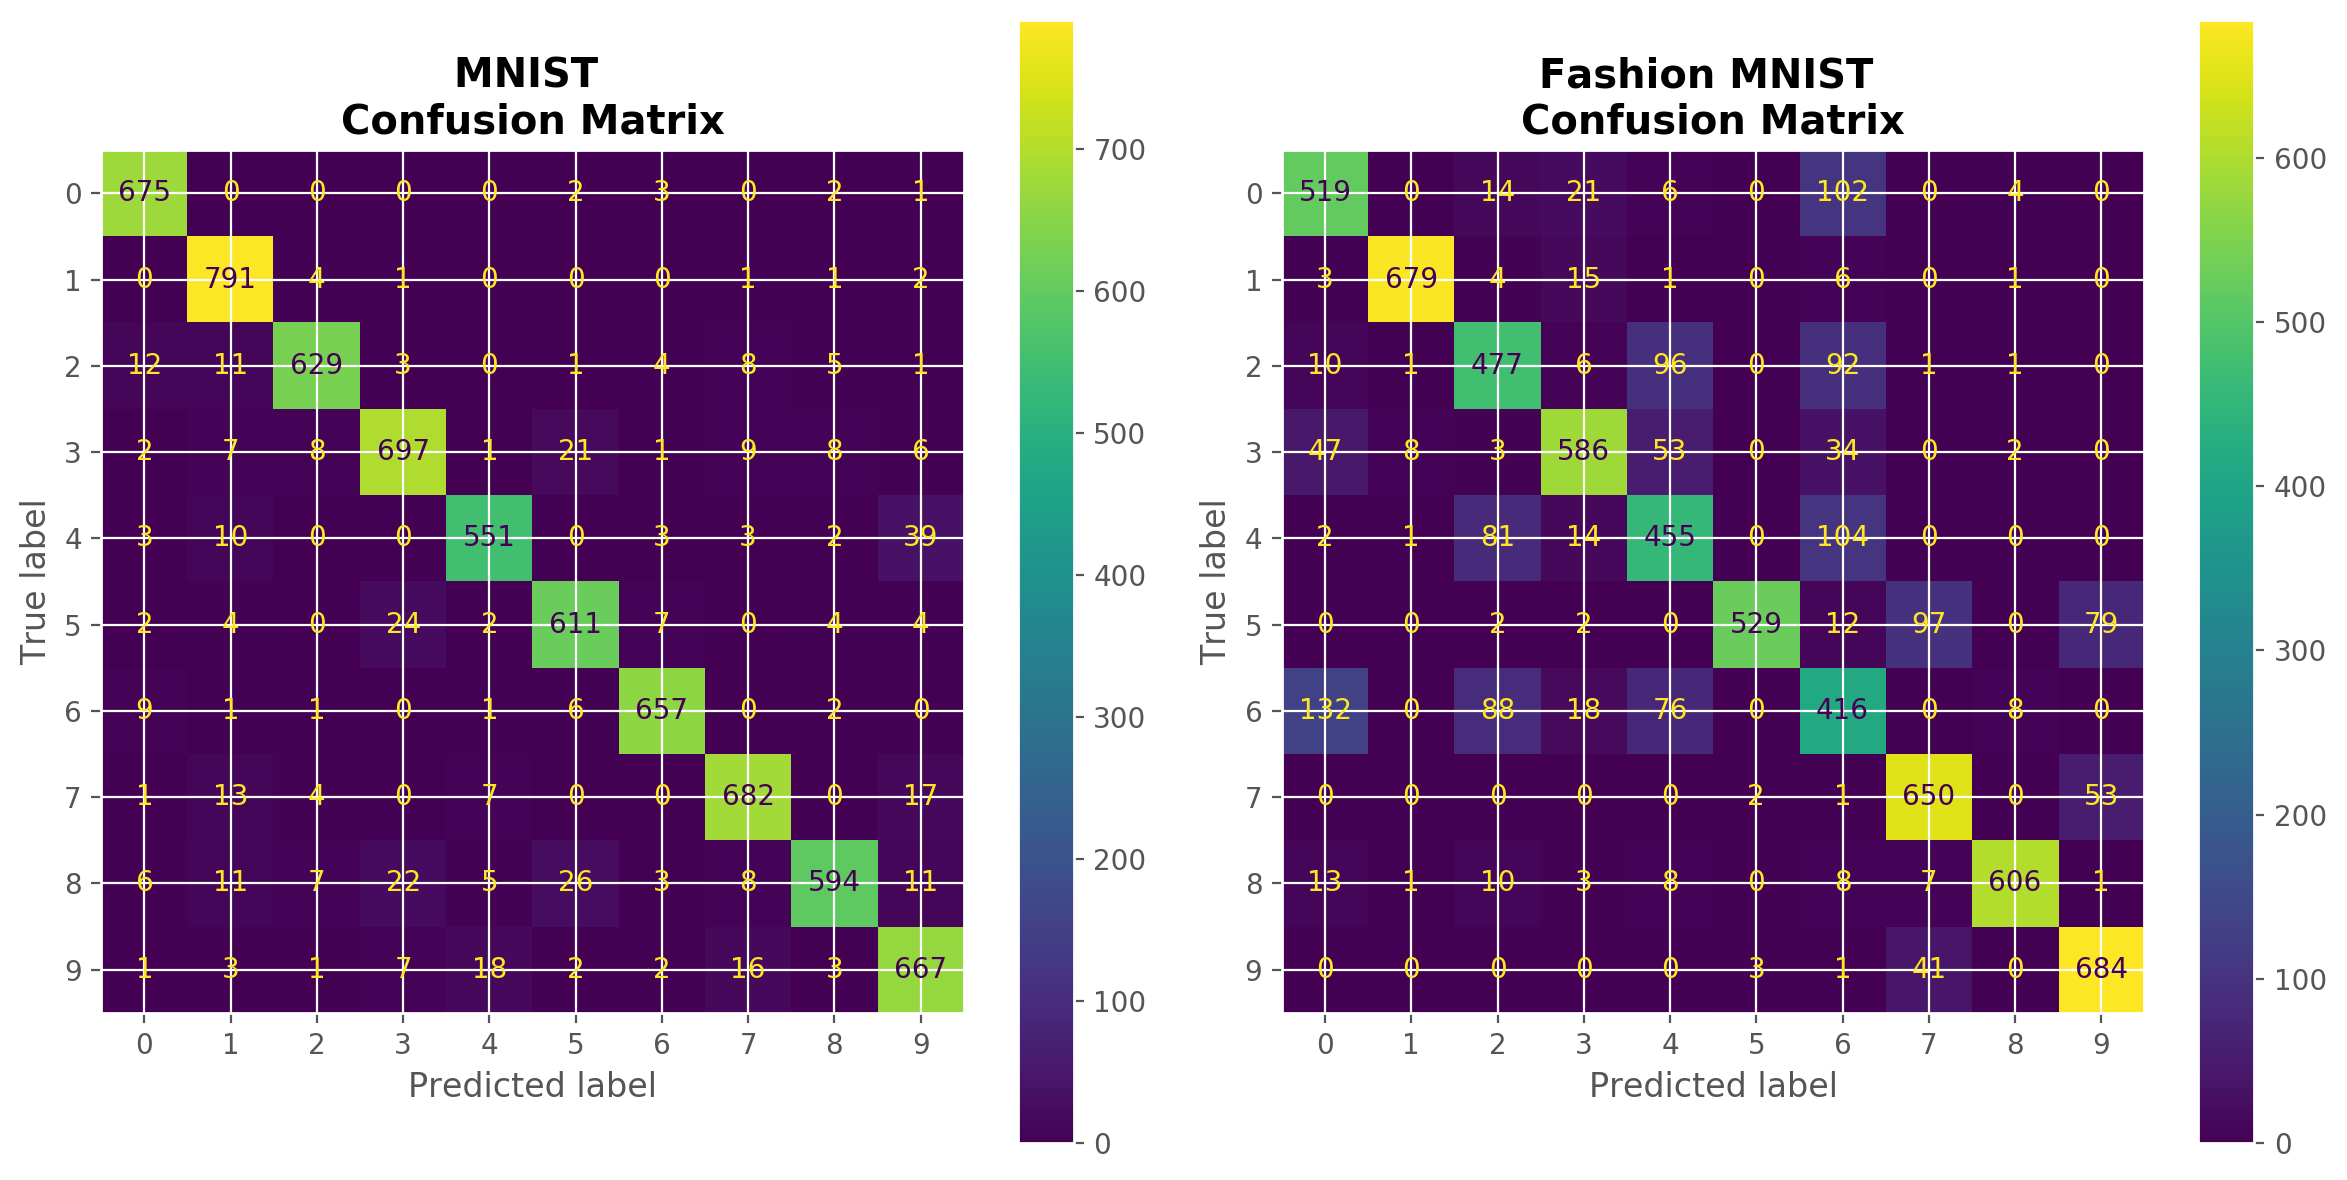

In [31]:
utl.plot_combined_confusion_matrix(clf, test_X, test_y,
                                   clf2, fashion_test_X,
                                   fashion_test_y, extra_name="Final_Confusion",
                                   directory=save_directory, fmt="d", plot_width=12, plot_height=6, folder="KNN")


# Final Metrics

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_mnist_estimator, train_X.iloc[:val, :], train_y.iloc[:val], test_X.iloc[:val, :],
                                 test_y.iloc[:val], folder="KNN", dataset_name="MNIST",
                                 plot_title="K Nearest Neighbors Test Set", is_final=True)

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_fashion_estimator, fashion_train_X.iloc[:val, :], 
                                     fashion_train_y.iloc[:val], fashion_test_X.iloc[:val, :],
                                 fashion_test_y.iloc[:val], folder="KNN", dataset_name="Fashion MNIST",
                                 plot_title="K Nearest Neighbors Test Set", is_final=True)